In [3]:
import pandas as pd
from modules.transformation import hot_encode
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



In [17]:
df = pd.read_csv('/Users/dl/Desktop/lighthouse_midterm/data/merge2.csv')

In [14]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,Type
0,2018-08-04,DL,DL,DL,118,DL,N368NW,118,15304,TPA,...,0.0,13.0,0.0,0.0,0.0,11.0,2018,8,4,Rain
1,2018-06-17,UA,UA_CODESHARE,UA,4921,C5,N14179,4921,11618,EWR,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,6,17,other


In [15]:
print(df.shape)
df.describe()

(99708, 31)


,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day
count,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.0,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000,99708.000000
mean,2735.733442,2735.679354,12685.618767,12682.715459,1331.483161,1486.332019,138.061219,1.0,769.162595,5.440035,0.014392,3.852028,0.666145,3.110723,0.012015,5.226842,2018.505737,6.569894,15.764181
std,1862.593671,1862.544427,1520.134974,1521.007038,489.330441,516.757660,72.013779,0.0,587.392326,49.244413,0.119101,28.392207,13.191408,18.836112,0.857432,25.309364,0.499970,3.395293,8.770732
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-32.000000,1.0,27.000000,-222.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,1127.000000,1127.000000,11292.000000,11292.000000,915.000000,1101.000000,87.000000,1.0,341.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,2319.000000,2319.000000,12889.000000,12889.000000,1324.000000,1513.000000,119.000000,1.0,605.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,7.000000,16.000000
75%,4320.000000,4320.000000,14057.000000,14057.000000,1735.000000,1919.000000,167.000000,1.0,1005.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,10.000000,23.000000
max,9391.000000,9391.000000,16869.000000,16869.000000,2359.000000,2359.000000,1544.000000,1.0,5095.000000,1558.000000,1.000000,1538.000000,1103.000000,1266.000000,172.000000,995.000000,2019.000000,12.000000,31.000000


In [18]:
df.columns


Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'cancelled', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year', 'month', 'day',
       'Type'],
      dtype='object')

In [19]:
col = ['fl_date','op_unique_carrier',
       'origin',  'dest','crs_dep_time',
       'crs_arr_time', 
       'arr_delay',
       'crs_elapsed_time', 'flights','distance','Type','day','month']

df = df[col]
df.head()

# 'year', 'month', 'day',

,fl_date,op_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,Type,day,month
0,2018-08-04,DL,TPA,BOS,1215,1527,24.0,192.0,1.0,1185.0,Rain,4,8
1,2018-06-17,C5,EWR,ITH,2140,2305,2.0,85.0,1.0,172.0,other,17,6
2,2019-11-21,OO,MTJ,DEN,715,832,-27.0,77.0,1.0,196.0,other,21,11
3,2019-06-02,WN,PHX,LAX,1650,1815,22.0,85.0,1.0,370.0,other,2,6
4,2018-12-25,ZW,CAE,ORD,1000,1128,121.0,148.0,1.0,666.0,other,25,12


In [78]:
# Split Date into date, month and year
df[['year', 'month', 'date']] = df.fl_date.str.split('-', expand = True)

# Replace Month numbers with month names for monthly data analysis 
df = df.replace({'month' : { '01' : 'Jan', '02' : 'Feb', '03' : 'Mar', 
                                  '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', 
                                  '08': 'Aug', '09': 'Sep', '10': 'Oct' , '11': 'Nov', '12': 'Dec'}})

In [20]:
df.head()

,fl_date,op_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,Type,day,month
0,2018-08-04,DL,TPA,BOS,1215,1527,24.0,192.0,1.0,1185.0,Rain,4,8
1,2018-06-17,C5,EWR,ITH,2140,2305,2.0,85.0,1.0,172.0,other,17,6
2,2019-11-21,OO,MTJ,DEN,715,832,-27.0,77.0,1.0,196.0,other,21,11
3,2019-06-02,WN,PHX,LAX,1650,1815,22.0,85.0,1.0,370.0,other,2,6
4,2018-12-25,ZW,CAE,ORD,1000,1128,121.0,148.0,1.0,666.0,other,25,12


In [21]:
df.arr_delay.describe()


count    99708.000000
mean         5.440035
std         49.244413
min       -222.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1558.000000
Name: arr_delay, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


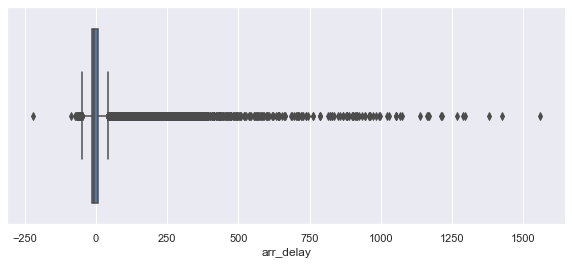

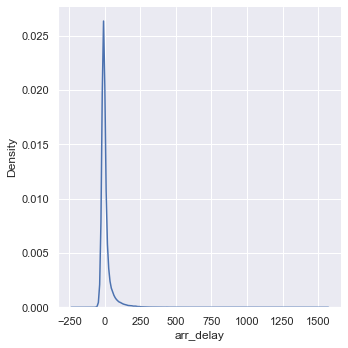

In [82]:
sns.boxplot(df['arr_delay']);
plt.show();
sns.displot(df, x="arr_delay",kind='kde')
plt.show()

In [22]:
df = df.drop(df[(df['arr_delay']>250)].index)
df.head()

,fl_date,op_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,Type,day,month
0,2018-08-04,DL,TPA,BOS,1215,1527,24.0,192.0,1.0,1185.0,Rain,4,8
1,2018-06-17,C5,EWR,ITH,2140,2305,2.0,85.0,1.0,172.0,other,17,6
2,2019-11-21,OO,MTJ,DEN,715,832,-27.0,77.0,1.0,196.0,other,21,11
3,2019-06-02,WN,PHX,LAX,1650,1815,22.0,85.0,1.0,370.0,other,2,6
4,2018-12-25,ZW,CAE,ORD,1000,1128,121.0,148.0,1.0,666.0,other,25,12


In [27]:
# Creating bins & categories for distance

bin_distance=[0,769,9000]
catg_distance=['Short','Long']
df['distance_catg']=pd.cut(df.distance, bin_distance, labels=catg_distance)

# Checking created bins and their distribution in dataset
df.distance_catg.value_counts()

Short    61225
Long     37972
Name: distance_catg, dtype: int64

<AxesSubplot:>

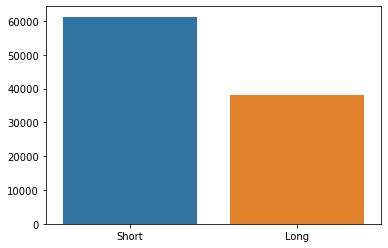

In [28]:
distanceBins = df.distance_catg.value_counts()
sns.barplot(x=distanceBins.index, y=distanceBins.values)

In [29]:
# Converting military time(hours and minutes) into 24 hours
df['crs_arr_hrs'] = (df['crs_arr_time']/100).astype(int)
df['crs_dep_hrs'] = (df['crs_dep_time']/100).astype(int)

In [30]:
# Creating Bins for arrival and departure hours

bin_time=[0,6,12,18,23]
catg_time=['Night','Morning','Afternoon','Evening']

# Arrival hours
arr_hrs_catg=df['crs_arr_hrs']
df['arr_hrs_catg']=pd.cut(arr_hrs_catg, bin_time, labels=catg_time)

# Checking Arrival class distribution
df['arr_hrs_catg'].value_counts()

Afternoon    35795
Morning      32250
Evening      27024
Night         2676
Name: arr_hrs_catg, dtype: int64

In [31]:
# Departure hours binning
dep_hrs_catg=df['crs_dep_hrs']
df['dep_hrs_catg']=pd.cut(dep_hrs_catg, bin_time, labels=catg_time)

# Checking Dearture hours distribution

df['dep_hrs_catg'].value_counts()

Morning      37492
Afternoon    35550
Evening      16377
Night         9583
Name: dep_hrs_catg, dtype: int64

In [32]:
# Working on categorical features
# Label Encoding

le = preprocessing.LabelEncoder()

In [33]:
df.dtypes

fl_date                object
op_unique_carrier      object
origin                 object
dest                   object
crs_dep_time            int64
crs_arr_time            int64
arr_delay             float64
crs_elapsed_time      float64
flights               float64
distance              float64
Type                   object
day                     int64
month                   int64
distance_catg        category
crs_arr_hrs             int64
crs_dep_hrs             int64
arr_hrs_catg         category
dep_hrs_catg         category
dtype: object

In [37]:
# Label encoding categorical values

df['op_unique_carrier_new'] = le.fit_transform(df.op_unique_carrier)
df['origin_new'] = le.fit_transform(df.origin)
df['dest_new'] = le.fit_transform(df.dest)
df['weather_type_new'] = le.fit_transform(df.Type)
df['month_new'] = le.fit_transform(df.month)
df['day_new'] = le.fit_transform(df.day)
df['distance_catg_new'] = le.fit_transform(df['distance_catg'].astype(str))
df['arr_hrs_catg_new'] = le.fit_transform(df['arr_hrs_catg'].astype(str))
df['dep_hrs_catg_new'] = le.fit_transform(df['dep_hrs_catg'].astype(str))

In [38]:
# Checking columns again

df.columns


Index(['fl_date', 'op_unique_carrier', 'origin', 'dest', 'crs_dep_time',
       'crs_arr_time', 'arr_delay', 'crs_elapsed_time', 'flights', 'distance',
       'Type', 'day', 'month', 'distance_catg', 'crs_arr_hrs', 'crs_dep_hrs',
       'arr_hrs_catg', 'dep_hrs_catg', 'op_unique_carrier_new', 'origin_new',
       'dest_new', 'weather_type_new', 'month_new', 'distance_catg_new',
       'arr_hrs_catg_new', 'dep_hrs_catg_new', 'day_new'],
      dtype='object')

In [40]:
df_feature = df[[
        'crs_elapsed_time',
       'op_unique_carrier_new', 'origin_new',
        'dest_new', 'weather_type_new',
         'month_new', 'distance_catg_new',
       'arr_hrs_catg_new', 'dep_hrs_catg_new', 'day_new','arr_delay']]

In [41]:
df_feature

,crs_elapsed_time,op_unique_carrier_new,origin_new,dest_new,weather_type_new,month_new,distance_catg_new,arr_hrs_catg_new,dep_hrs_catg_new,day_new,arr_delay
0,192.0,8,348,46,4,7,0,0,2,3,24.0
1,85.0,6,118,177,7,5,1,1,1,16,2.0
2,77.0,19,242,92,7,10,1,2,2,20,-27.0
3,85.0,24,269,193,7,5,1,0,0,1,22.0
4,148.0,27,60,253,7,11,1,2,2,24,121.0
...,...,...,...,...,...,...,...,...,...,...,...
99703,139.0,8,21,306,4,6,0,2,2,5,-7.0
99704,120.0,24,93,306,1,10,0,1,0,4,7.0
99705,172.0,2,126,266,7,3,0,2,3,21,-5.0
99706,235.0,2,94,318,7,5,0,2,2,11,20.0


In [42]:
df_feature.to_csv('/Users/dl/Desktop/lighthouse_midterm/data/df_feature.csv', index= False)
